Different Statistics that might be useful:

Ward locations during early game (mid/late don't seem to be that important from watching analysis): clustering

Jungle Pathing tendencies: Clustering/?

Any movement patterns from support, mid, top

Drafting Patterns: Standard ML multiclass classification

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import plotly.express as px
import plotly.graph_objects as go

In [2]:
game_summary = pd.read_parquet('Data/game_summary.parquet')
objective = pd.read_parquet('Data/objective_kills.parquet')
player_game_stats = pd.read_parquet('Data/player_game_stats.parquet')
snapshot_stats = pd.read_parquet('Data/snapshot_player_stats.parquet')
wards = pd.read_parquet('Data/wards_placed.parquet')

In [19]:
game_summary.shape

(32, 62)

In [4]:
game_summary.head(1)

,game_urn,match_perid,region,game_start_date_time,series_type,series_max,series_curr,team_1_urn,team_1_name,team_1_side,...,team_2_top_pick_num,team_2_jng,team_2_jng_pick_num,team_2_mid,team_2_mid_pick_num,team_2_bot,team_2_bot_pick_num,team_2_sup,team_2_sup_pick_num,game_version
0,live:lol:riot:map:esportstmnt01-3373466,esports:match:c8b9a529-2453-4789-8300-ae4173e4...,LCS,2023-06-14 21:13:15.338000+00:00,BEST_OF,1,1,live:lol:riot:team:98767991877340524,C9,blue,...,10,Jax,7,Ahri,3,Lucian,2,Nami,6,13.11.512.8126


In [40]:
C9_games = game_summary[(game_summary['team_1_name'] == 'C9') | (game_summary['team_2_name'] == 'C9')]
Eg_games = game_summary[(game_summary['team_1_name'] == 'C9') | (game_summary['team_2_name'] == 'C9')]

In [42]:
C9_games.columns

Index(['game_urn', 'match_perid', 'region', 'game_start_date_time',
       'series_type', 'series_max', 'series_curr', 'team_1_urn', 'team_1_name',
       'team_1_side', 'team_2_urn', 'team_2_name', 'team_2_side',
       'winning_team_urn', 'winning_team', 'winning_side',
       'game_duration_mins', 'bb1', 'rb1', 'bb2', 'rb2', 'bb3', 'rb3', 'bp1',
       'rp1', 'rp2', 'bp2', 'bp3', 'rp3', 'rb4', 'bb4', 'rb5', 'bb5', 'rp4',
       'bp4', 'bp5', 'rp5', 'team_1_perid', 'team_2_perid',
       'winning_team_perid', 'upsert_at', 'team_1_top', 'team_1_top_pick_num',
       'team_1_jng', 'team_1_jng_pick_num', 'team_1_mid',
       'team_1_mid_pick_num', 'team_1_bot', 'team_1_bot_pick_num',
       'team_1_sup', 'team_1_sup_pick_num', 'team_2_top',
       'team_2_top_pick_num', 'team_2_jng', 'team_2_jng_pick_num',
       'team_2_mid', 'team_2_mid_pick_num', 'team_2_bot',
       'team_2_bot_pick_num', 'team_2_sup', 'team_2_sup_pick_num',
       'game_version'],
      dtype='object')

In [51]:
C9_games[['team_1_top', 'team_1_jng', 'team_1_mid','team_1_bot','team_1_sup', 
        'team_2_top','team_2_jng','team_2_mid', 'team_2_bot', 'team_2_sup', 'winning_team']]

,team_1_top,team_1_jng,team_1_mid,team_1_bot,team_1_sup,team_2_top,team_2_jng,team_2_mid,team_2_bot,team_2_sup,winning_team
0,KSante,Kindred,Gragas,Zeri,Milio,Ornn,Jax,Ahri,Lucian,Nami,C9
2,Gragas,Kindred,KSante,Aphelios,Milio,Malphite,MonkeyKing,Ahri,Jhin,Karma,C9
4,Kennen,Nocturne,Neeko,Kaisa,Nautilus,Renekton,Vi,Azir,Aphelios,Thresh,C9
6,Kennen,Vi,Annie,Aphelios,Yuumi,Jayce,MonkeyKing,Azir,Kaisa,Rell,NRG
7,Gnar,Vi,Annie,Kaisa,Rell,KSante,Viego,Ahri,Aphelios,Alistar,C9
10,KSante,Kindred,Ahri,Ashe,Milio,Renekton,Sejuani,Jayce,Varus,Janna,C9
14,Renekton,Maokai,Tristana,Varus,Heimerdinger,Jax,Sejuani,Leblanc,Aphelios,Rell,C9
15,Renekton,Kindred,Lissandra,Ashe,Milio,Kennen,MonkeyKing,Ziggs,Aphelios,Rakan,TL
16,Rumble,Maokai,Jayce,Kaisa,Nautilus,Kennen,LeeSin,Ahri,Varus,Rell,C9
18,Renekton,Maokai,Tristana,KogMaw,Braum,Jax,Sejuani,Jayce,Aphelios,Rell,C9


In [22]:
game_summary.columns

Index(['game_urn', 'match_perid', 'region', 'game_start_date_time',
       'series_type', 'series_max', 'series_curr', 'team_1_urn', 'team_1_name',
       'team_1_side', 'team_2_urn', 'team_2_name', 'team_2_side',
       'winning_team_urn', 'winning_team', 'winning_side',
       'game_duration_mins', 'bb1', 'rb1', 'bb2', 'rb2', 'bb3', 'rb3', 'bp1',
       'rp1', 'rp2', 'bp2', 'bp3', 'rp3', 'rb4', 'bb4', 'rb5', 'bb5', 'rp4',
       'bp4', 'bp5', 'rp5', 'team_1_perid', 'team_2_perid',
       'winning_team_perid', 'upsert_at', 'team_1_top', 'team_1_top_pick_num',
       'team_1_jng', 'team_1_jng_pick_num', 'team_1_mid',
       'team_1_mid_pick_num', 'team_1_bot', 'team_1_bot_pick_num',
       'team_1_sup', 'team_1_sup_pick_num', 'team_2_top',
       'team_2_top_pick_num', 'team_2_jng', 'team_2_jng_pick_num',
       'team_2_mid', 'team_2_mid_pick_num', 'team_2_bot',
       'team_2_bot_pick_num', 'team_2_sup', 'team_2_sup_pick_num',
       'game_version'],
      dtype='object')

In [5]:
objective.head(2)

,game_urn,seq_idx,event_date_time,game_time,monster_type,dragon_type,killer_team_urn,killer_team,killer_urn,killer,assistants,pos_x,pos_y,killer_team_perid,killer_perid,upsert_at
0,live:lol:riot:map:esportstmnt01-3373466,0,2023-06-14 21:14:52.074000+00:00,96867,raptor,None,live:lol:riot:team:99294153824386385,GG,live:lol:riot:player:6d68f827-0469-30af-878b-3...,River,,6963,4753,esports:team:44f6a80f-b0b7-432e-b6fe-1127ed555938,esports:player:654a72de-a5ee-44b9-9aa9-149ddd5...,2023-06-14 22:04:25.983167+00:00
1,live:lol:riot:map:esportstmnt01-3373466,1,2023-06-14 21:15:31.019000+00:00,135819,wolf,None,live:lol:riot:team:98767991877340524,C9,live:lol:riot:player:7f12e011-7e41-3b24-a73e-4...,Blaber,,3268,6923,esports:team:c2be4c5e-e1e3-4c05-8098-914da28289ab,esports:player:4021e06c-1d01-4cbe-8a72-990e42b...,2023-06-14 22:04:25.983167+00:00


In [6]:
player_game_stats.head(2)

,game_urn,player_urn,team_urn,region,game_start_datetime,best_of,curr_game,player,team,champion,...,vision_score,jungle_prox,duo_prox,team_perid,player_perid,opp_player_perid,opp_team_urn_perid,upsert_at,gold_at_20m,gold_diff_at_20m
0,live:lol:riot:map:esportstmnt01-3373466,live:lol:riot:player:37643ce5-d0ef-31f1-a000-a...,live:lol:riot:team:99294153824386385,LCS,2023-06-14 21:13:15.338000+00:00,1,1,huhi,GG,Nami,...,87.457497,0.322147,0.430611,esports:team:44f6a80f-b0b7-432e-b6fe-1127ed555938,esports:player:cd2bc07a-142e-4f89-bb89-b48eff2...,esports:player:f055bb59-5b23-4ba1-babe-f362412...,esports:team:c2be4c5e-e1e3-4c05-8098-914da28289ab,2023-06-14 22:04:29.271665+00:00,None,None
1,live:lol:riot:map:esportstmnt01-3373466,live:lol:riot:player:051c9431-16d0-3872-98c4-c...,live:lol:riot:team:98767991877340524,LCS,2023-06-14 21:13:15.338000+00:00,1,1,Fudge,C9,KSante,...,28.866512,0.087547,NaN,esports:team:c2be4c5e-e1e3-4c05-8098-914da28289ab,esports:player:6c3f2a06-dbbc-4e07-8e68-2d83b00...,esports:player:112a2549-b3ca-4094-91f1-d509238...,esports:team:44f6a80f-b0b7-432e-b6fe-1127ed555938,2023-06-14 22:04:29.271665+00:00,None,None


In [7]:
snapshot_stats.head(5)

,game_urn,player_urn,seq_idx,event_date_time,game_time,winning_team,player,team_urn,team,champion,...,vision_score,total_damage_dealt_champions,total_damage_taken,item_1_id,item_2_id,item_3_id,item_4_id,item_5_id,item_6_id,item_7_id
0,live:lol:riot:map:esportstmnt01-3373466,live:lol:riot:player:051c9431-16d0-3872-98c4-c...,16,2023-06-14 21:13:15.338000+00:00,138,None,Fudge,live:lol:riot:team:98767991877340524,C9,KSante,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,live:lol:riot:map:esportstmnt01-3373466,live:lol:riot:player:7f12e011-7e41-3b24-a73e-4...,16,2023-06-14 21:13:15.338000+00:00,138,None,Blaber,live:lol:riot:team:98767991877340524,C9,Kindred,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,live:lol:riot:map:esportstmnt01-3373466,live:lol:riot:player:8146eacb-7313-3639-ac26-0...,16,2023-06-14 21:13:15.338000+00:00,138,None,EMENES,live:lol:riot:team:98767991877340524,C9,Gragas,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,live:lol:riot:map:esportstmnt01-3373466,live:lol:riot:player:571444c9-662e-38fc-b857-4...,16,2023-06-14 21:13:15.338000+00:00,138,None,Berserker,live:lol:riot:team:98767991877340524,C9,Zeri,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,live:lol:riot:map:esportstmnt01-3373466,live:lol:riot:player:c5b97127-7d85-3d54-ab35-e...,16,2023-06-14 21:13:15.338000+00:00,138,None,Zven,live:lol:riot:team:98767991877340524,C9,Milio,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
snapshot_stats.columns

Index(['game_urn', 'player_urn', 'seq_idx', 'event_date_time', 'game_time',
       'winning_team', 'player', 'team_urn', 'team', 'champion', 'level',
       'alive', 'health', 'current_gold', 'total_gold', 'gold_per_second',
       'pos_x', 'pos_y', 'minions_killed', 'neutral_minions_killed',
       'neutral_minions_killed_your_jungle',
       'neutral_minions_killed_enemy_jungle', 'champs_killed', 'deaths',
       'assists', 'wards_placed', 'wards_killed', 'vision_score',
       'total_damage_dealt_champions', 'total_damage_taken', 'item_1_id',
       'item_2_id', 'item_3_id', 'item_4_id', 'item_5_id', 'item_6_id',
       'item_7_id'],
      dtype='object')

In [59]:
snapshot_stats[snapshot_stats['game_time'] == 135]

,game_urn,player_urn,seq_idx,event_date_time,game_time,winning_team,player,team_urn,team,champion,...,vision_score,total_damage_dealt_champions,total_damage_taken,item_1_id,item_2_id,item_3_id,item_4_id,item_5_id,item_6_id,item_7_id
872330,live:lol:riot:map:esportstmnt01-3417177,live:lol:riot:player:051c9431-16d0-3872-98c4-c...,16,2023-08-20 23:14:49.401000+00:00,135,None,Fudge,live:lol:riot:team:98767991877340524,C9,Rumble,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
872331,live:lol:riot:map:esportstmnt01-3417177,live:lol:riot:player:7f12e011-7e41-3b24-a73e-4...,16,2023-08-20 23:14:49.401000+00:00,135,None,Blaber,live:lol:riot:team:98767991877340524,C9,Sejuani,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
872332,live:lol:riot:map:esportstmnt01-3417177,live:lol:riot:player:8146eacb-7313-3639-ac26-0...,16,2023-08-20 23:14:49.401000+00:00,135,None,EMENES,live:lol:riot:team:98767991877340524,C9,Yone,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
872333,live:lol:riot:map:esportstmnt01-3417177,live:lol:riot:player:571444c9-662e-38fc-b857-4...,16,2023-08-20 23:14:49.401000+00:00,135,None,Berserker,live:lol:riot:team:98767991877340524,C9,Draven,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
872334,live:lol:riot:map:esportstmnt01-3417177,live:lol:riot:player:c5b97127-7d85-3d54-ab35-e...,16,2023-08-20 23:14:49.401000+00:00,135,None,Zven,live:lol:riot:team:98767991877340524,C9,Renata,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
872335,live:lol:riot:map:esportstmnt01-3417177,live:lol:riot:player:b36179da-3e05-3a7b-9383-2...,16,2023-08-20 23:14:49.401000+00:00,135,None,Dhokla,live:lol:riot:team:106972778172351142,NRG,Jax,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
872336,live:lol:riot:map:esportstmnt01-3417177,live:lol:riot:player:e50d1e40-0012-37d0-b925-f...,16,2023-08-20 23:14:49.401000+00:00,135,None,Contractz,live:lol:riot:team:106972778172351142,NRG,Rell,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
872337,live:lol:riot:map:esportstmnt01-3417177,live:lol:riot:player:84b21685-d98c-3d7a-b447-8...,16,2023-08-20 23:14:49.401000+00:00,135,None,Palafox,live:lol:riot:team:106972778172351142,NRG,Neeko,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
872338,live:lol:riot:map:esportstmnt01-3417177,live:lol:riot:player:b3b1b929-80c7-328f-9ff3-0...,16,2023-08-20 23:14:49.401000+00:00,135,None,FBI,live:lol:riot:team:106972778172351142,NRG,Zeri,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
872339,live:lol:riot:map:esportstmnt01-3417177,live:lol:riot:player:19d808be-6331-357b-a216-4...,16,2023-08-20 23:14:49.401000+00:00,135,None,IgNar,live:lol:riot:team:106972778172351142,NRG,Alistar,...,0.0,0.0,0.0,2403.0,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
snapshot_stats[['seq_idx', 'pos_x', 'pos_y']].head(10)

,seq_idx,pos_x,pos_y
0,16,554,581
1,16,593,464
2,16,557,345
3,16,458,271
4,16,335,269
5,16,14500,14511
6,16,14539,14394
7,16,14503,14275
8,16,14404,14201
9,16,14281,14199


In [8]:
wards.head(5)

,game_urn,seq_idx,event_date_time,game_time,ward_type,placer_team_urn,placer_team,placer_urn,placer,pos_x,pos_y,placer_team_perid,placer_perid,upsert_at
0,live:lol:riot:map:esportstmnt01-3373466,0,2023-06-14 21:14:35.125000+00:00,79926,yellowTrinket,live:lol:riot:team:98767991877340524,C9,live:lol:riot:player:8146eacb-7313-3639-ac26-0...,EMENES,9330,5592,esports:team:c2be4c5e-e1e3-4c05-8098-914da28289ab,esports:player:c39d6f48-788f-4bf4-9f37-34e816b...,2023-06-14 22:04:24.352030+00:00
1,live:lol:riot:map:esportstmnt01-3373466,1,2023-06-14 21:14:41.603000+00:00,86404,yellowTrinket,live:lol:riot:team:99294153824386385,GG,live:lol:riot:player:6d68f827-0469-30af-878b-3...,River,8566,4872,esports:team:44f6a80f-b0b7-432e-b6fe-1127ed555938,esports:player:654a72de-a5ee-44b9-9aa9-149ddd5...,2023-06-14 22:04:24.352030+00:00
2,live:lol:riot:map:esportstmnt01-3373466,2,2023-06-14 21:14:47.263000+00:00,92064,yellowTrinket,live:lol:riot:team:99294153824386385,GG,live:lol:riot:player:37643ce5-d0ef-31f1-a000-a...,huhi,10637,3012,esports:team:44f6a80f-b0b7-432e-b6fe-1127ed555938,esports:player:cd2bc07a-142e-4f89-bb89-b48eff2...,2023-06-14 22:04:24.352030+00:00
3,live:lol:riot:map:esportstmnt01-3373466,3,2023-06-14 21:15:03.016000+00:00,107817,yellowTrinket,live:lol:riot:team:98767991877340524,C9,live:lol:riot:player:7f12e011-7e41-3b24-a73e-4...,Blaber,6492,4684,esports:team:c2be4c5e-e1e3-4c05-8098-914da28289ab,esports:player:4021e06c-1d01-4cbe-8a72-990e42b...,2023-06-14 22:04:24.352030+00:00
4,live:lol:riot:map:esportstmnt01-3373466,4,2023-06-14 21:15:13.961000+00:00,118763,yellowTrinket,live:lol:riot:team:98767991877340524,C9,live:lol:riot:player:c5b97127-7d85-3d54-ab35-e...,Zven,12256,1318,esports:team:c2be4c5e-e1e3-4c05-8098-914da28289ab,esports:player:f055bb59-5b23-4ba1-babe-f362412...,2023-06-14 22:04:24.352030+00:00


In [9]:
wards['game_urn'].nunique()

32

In [10]:
game_summary['game_urn'].nunique()

32

In [11]:
test_game = 'live:lol:riot:map:esportstmnt01-3373466'

In [27]:
all_wards = wards[wards['game_urn'] == test_game]

In [13]:
all_wards

,game_urn,seq_idx,event_date_time,game_time,ward_type,placer_team_urn,placer_team,placer_urn,placer,pos_x,pos_y,placer_team_perid,placer_perid,upsert_at
0,live:lol:riot:map:esportstmnt01-3373466,0,2023-06-14 21:14:35.125000+00:00,79926,yellowTrinket,live:lol:riot:team:98767991877340524,C9,live:lol:riot:player:8146eacb-7313-3639-ac26-0...,EMENES,9330,5592,esports:team:c2be4c5e-e1e3-4c05-8098-914da28289ab,esports:player:c39d6f48-788f-4bf4-9f37-34e816b...,2023-06-14 22:04:24.352030+00:00
1,live:lol:riot:map:esportstmnt01-3373466,1,2023-06-14 21:14:41.603000+00:00,86404,yellowTrinket,live:lol:riot:team:99294153824386385,GG,live:lol:riot:player:6d68f827-0469-30af-878b-3...,River,8566,4872,esports:team:44f6a80f-b0b7-432e-b6fe-1127ed555938,esports:player:654a72de-a5ee-44b9-9aa9-149ddd5...,2023-06-14 22:04:24.352030+00:00
2,live:lol:riot:map:esportstmnt01-3373466,2,2023-06-14 21:14:47.263000+00:00,92064,yellowTrinket,live:lol:riot:team:99294153824386385,GG,live:lol:riot:player:37643ce5-d0ef-31f1-a000-a...,huhi,10637,3012,esports:team:44f6a80f-b0b7-432e-b6fe-1127ed555938,esports:player:cd2bc07a-142e-4f89-bb89-b48eff2...,2023-06-14 22:04:24.352030+00:00
3,live:lol:riot:map:esportstmnt01-3373466,3,2023-06-14 21:15:03.016000+00:00,107817,yellowTrinket,live:lol:riot:team:98767991877340524,C9,live:lol:riot:player:7f12e011-7e41-3b24-a73e-4...,Blaber,6492,4684,esports:team:c2be4c5e-e1e3-4c05-8098-914da28289ab,esports:player:4021e06c-1d01-4cbe-8a72-990e42b...,2023-06-14 22:04:24.352030+00:00
4,live:lol:riot:map:esportstmnt01-3373466,4,2023-06-14 21:15:13.961000+00:00,118763,yellowTrinket,live:lol:riot:team:98767991877340524,C9,live:lol:riot:player:c5b97127-7d85-3d54-ab35-e...,Zven,12256,1318,esports:team:c2be4c5e-e1e3-4c05-8098-914da28289ab,esports:player:f055bb59-5b23-4ba1-babe-f362412...,2023-06-14 22:04:24.352030+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,live:lol:riot:map:esportstmnt01-3373466,183,2023-06-14 21:39:05.132000+00:00,1549913,control,live:lol:riot:team:98767991877340524,C9,live:lol:riot:player:051c9431-16d0-3872-98c4-c...,Fudge,7948,11800,esports:team:c2be4c5e-e1e3-4c05-8098-914da28289ab,esports:player:6c3f2a06-dbbc-4e07-8e68-2d83b00...,2023-06-14 22:04:24.352030+00:00
184,live:lol:riot:map:esportstmnt01-3373466,184,2023-06-14 21:39:05.535000+00:00,1550318,unknown,live:lol:riot:team:98767991877340524,C9,live:lol:riot:player:c5b97127-7d85-3d54-ab35-e...,Zven,6407,12823,esports:team:c2be4c5e-e1e3-4c05-8098-914da28289ab,esports:player:f055bb59-5b23-4ba1-babe-f362412...,2023-06-14 22:04:24.352030+00:00
185,live:lol:riot:map:esportstmnt01-3373466,185,2023-06-14 21:39:09.077000+00:00,1553860,blueTrinket,live:lol:riot:team:98767991877340524,C9,live:lol:riot:player:8146eacb-7313-3639-ac26-0...,EMENES,8456,12420,esports:team:c2be4c5e-e1e3-4c05-8098-914da28289ab,esports:player:c39d6f48-788f-4bf4-9f37-34e816b...,2023-06-14 22:04:24.352030+00:00
186,live:lol:riot:map:esportstmnt01-3373466,186,2023-06-14 21:39:25.007000+00:00,1569790,unknown,live:lol:riot:team:98767991877340524,C9,live:lol:riot:player:c5b97127-7d85-3d54-ab35-e...,Zven,10212,13176,esports:team:c2be4c5e-e1e3-4c05-8098-914da28289ab,esports:player:f055bb59-5b23-4ba1-babe-f362412...,2023-06-14 22:04:24.352030+00:00


1600
1600


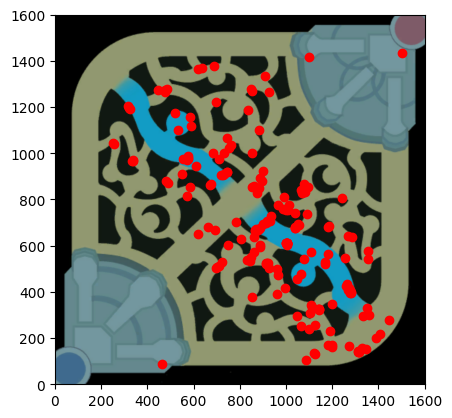

In [118]:
bg_image_path = 'leagueScaled.png'
bg_image = Image.open(bg_image_path).transpose(Image.FLIP_TOP_BOTTOM)

fig, ax = plt.subplots()
ax.imshow(bg_image)
ax.set_xlim(0, bg_image.width)
ax.set_ylim(0, bg_image.height)
print(bg_image.width)
print(bg_image.height)

scale_factor = 9.3

for x, y in all_wards[['pos_x', 'pos_y']].to_numpy():
    ax.plot(x/scale_factor, y/scale_factor, 'ro')

plt.show()

In [33]:
fig = go.Figure()
# Add image
img_width = 1600
img_height = 900
scale_factor = 0.5
fig.add_layout_image(
        x=0,
        sizex=img_width,
        y=0,
        sizey=img_height,
        xref="x",
        yref="y",
        opacity=1.0,
        layer="below",
        source="LoL-minimap.jpg"
)
fig.update_xaxes(showgrid=False, range=(0, img_width))
fig.update_yaxes(showgrid=False, scaleanchor='x', range=(img_height, 0))

In [34]:
fig = px.scatter(all_wards, x='pos_x', y='pos_y')
# Add image
img_width = 1600
img_height = 900
scale_factor = 0.5

background_image = go.layout.Image(
        source="LoL-minimap.jpg"
        x=0,
        sizex=img_width,
        y=0,
        sizey=img_height,
        xref="x",
        yref="y",
        opacity=1.0,
        layer="below",
)
fig.update_layout(images=[background_image])

fig.update_xaxes(showgrid=False, range=(0, 15_000))
fig.show()